In [177]:
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np
import os, sys
from astropy.stats import sigma_clip
from datetime import datetime
import seaborn as sns
from mpl_toolkits.axes_grid1 import make_axes_locatable
sns.set()
from scipy.stats import norm
import pandas as pd
import warnings
import matplotlib.mlab as mlab
from pandas import DataFrame
import astropy
sns.set(style ='white')
import matplotlib.transforms as mtransforms



In [114]:
pwd

'/home/jovyan/ASTR_136/Spectroscopy'

### MASTER BIAS

In [118]:
filedir = '/home/jovyan/ASTR_136/Spectroscopy/BIAS' 
files_bias = [os.path.join(filedir, f) for f in os.listdir(filedir)]

In [120]:
files_bias = files_bias[1:6]

In [121]:
bias_data = []
bias_exp = []
    
for i in range(len(files_bias)):
    hdu = fits.open(files_bias[i])
    bias_data.append(hdu[0].data)
    bias_exp.append(hdu[0].header['EXPTIME'])        

bias_data = np.stack(bias_data, axis=-1)

In [122]:
bias_data.shape

(2725, 725, 5)

In [132]:
bias_data[:,:,0].shape

(2725, 725)

In [129]:
bias_mean = np.mean(bias_data,axis=(0,1))
bias_median = np.median(bias_data,axis=(0,1))
bias_std = np.std(bias_data, axis = (0,1))
bias_counts = np.sum(bias_data, axis=(0,1))
bias_count_error = np.sqrt(bias_mean)

biasdata_clipped = sigma_clip(bias_data)
bias_master = np.median(biasdata_clipped, axis=2)

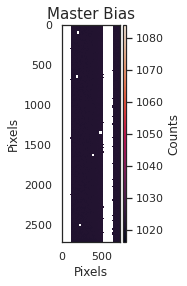

In [135]:
warnings.filterwarnings("ignore")

ax = plt.subplot(111)
im = ax.imshow(bias_master)
plt.title('Master Bias', loc= 'center', fontsize=15)
plt.xlabel('Pixels')
plt.ylabel('Pixels')
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)

cbar = plt.colorbar(im,  cax=cax)
cbar.ax.set_ylabel('Counts')

plt.show()

### MASTER FLAT

In [136]:
filedir = '/home/jovyan/ASTR_136/Spectroscopy/FLAT'
files_flat= [os.path.join(filedir, f) for f in os.listdir(filedir) if f.endswith('.fits')]

In [137]:
files_flat

['/home/jovyan/ASTR_136/Spectroscopy/FLAT/r349.fits',
 '/home/jovyan/ASTR_136/Spectroscopy/FLAT/r351.fits',
 '/home/jovyan/ASTR_136/Spectroscopy/FLAT/r350.fits',
 '/home/jovyan/ASTR_136/Spectroscopy/FLAT/r352.fits']

In [145]:
flat_exp = []
flat_data = []

for i in range(len(files_flat)):
    hdu_flat = fits.open(files_flat[i])
    corr_flat = ((hdu_flat[0].data - bias_master)/hdu_flat[0].header['EXPTIME'])
    flat_clipped = sigma_clip(corr_flat)
    flat_min = np.min(flat_clipped)
    flat_norm = (flat_clipped / flat_min)
    flat_data.append(flat_norm)
    flat_exp.append(hdu_flat[0].header['EXPTIME'])

#flat_masks = [arr.mask for arr in flat_data] # Get masks for each image in flat_data
#flat_data = np.ma.masked_array(data=np.dstack(flat_data),
                                 #mask=np.dstack(flat_masks)) # Create stacked masked array

In [148]:
flat_data = np.array(flat_data)

In [151]:
flat_master = np.median(flat_data, axis = 0)

In [153]:
flat_master.shape

(2725, 725)

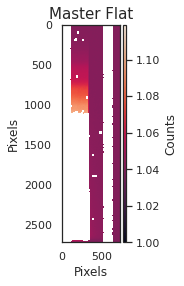

In [167]:
ax = plt.subplot(111)
im = ax.imshow(flat_norm)
plt.title('Master Flat', loc= 'center', fontsize=15)
plt.xlabel('Pixels')
plt.ylabel('Pixels')
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)

cbar = plt.colorbar(im,  cax=cax)
cbar.ax.set_ylabel('Counts')

plt.show()

### MASTER SCIENCE

In [170]:
filedir = '/home/jovyan/ASTR_136/Spectroscopy/SCI'
files_science = [os.path.join(filedir, f) for f in os.listdir(filedir)if f.endswith('.fits')]

In [171]:
science_data = []
for i in range(len(files_science)):
    hdu_sci = fits.open(files_science[i])
    header_sci = hdu_sci[0].header
    sci_clipped = sigma_clip(hdu_sci[0].data)
    correct_sci = (((sci_clipped - bias_master) / header_sci['EXPTIME'])) / flat_master
    science_data.append(correct_sci)


science_data = np.array(science_data)

In [189]:
science_master = np.median(science_data, axis = 0)
science_master = science_master.T
science_shape = science_master[10:330,:]

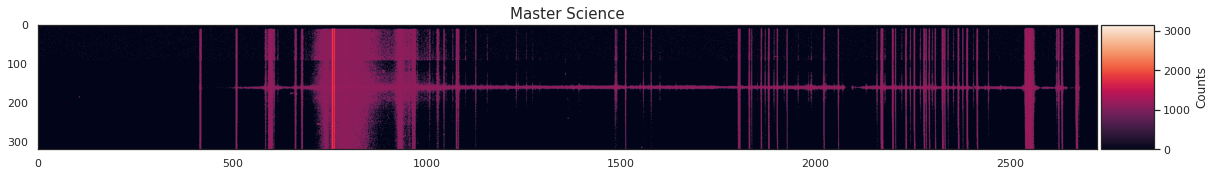

In [237]:
sns.set(style ='white')
plt.figure(figsize = (20,45))
ax = plt.subplot(111)
im = ax.imshow(science_shape)
plt.title('Master Science', loc= 'center', fontsize=15)
#plt.xlabel('Pixels')
#plt.ylabel('Pixels')
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)

cbar = plt.colorbar(im,  cax=cax)
cbar.ax.set_ylabel('Counts')

plt.show()

### ARC SCIENCE

In [238]:
filedir = '/home/jovyan/ASTR_136/Spectroscopy/ARC'
files_ARC = [os.path.join(filedir, f) for f in os.listdir(filedir)if f.endswith('.fits')]

In [239]:
ARC_data = []
for i in range(len(files_ARC)):
    hdu_ARC = fits.open(files_ARC[i])
    header_ARC = hdu_ARC[0].header
    ARC_clipped = sigma_clip(hdu_ARC[0].data)
    correct_ARC = (((ARC_clipped - bias_master) / header_ARC['EXPTIME'])) / flat_master
    ARC_data.append(correct_ARC)

ARC_data = np.array(ARC_data)

In [240]:
ARC_data.shape

(4, 2725, 725)

In [241]:
ARC_master = np.median(ARC_data, axis = 0)
ARC_trans = ARC_master.T

In [ ]:
sns.set(style ='white')
plt.figure(figsize = (8,5))
ax = plt.subplot(111)
im = ax.imshow(ARC_master)
plt.title('Master ARC', loc= 'center', fontsize=15)
#plt.xlabel('Pixels')
#plt.ylabel('Pixels')
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)

cbar = plt.colorbar(im,  cax=cax)
cbar.ax.set_ylabel('Counts')

plt.show()